In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

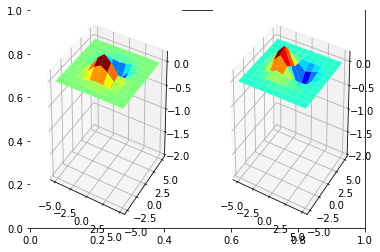

In [12]:
delta = 1
xx, yy = np.meshgrid(np.arange(-5,5+delta,delta),np.arange(-5,5+delta,delta))
sigma = 1

g = np.exp(-(xx**2 + yy**2)/(2*sigma**2))
g /= np.sum(g)

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype=np.float32)
sobel_h = np.array([[-1,0,1],[-2,0,2],[1,0,1]],dtype=np.float32)

g_x = cv.filter2D(g,-1,sobel_v)
g_y = cv.filter2D(g,-1,sobel_h)
fig,ax = plt.subplots()
ax = fig.add_subplot(121,projection='3d')
ax1 = fig.add_subplot(122,projection='3d')

surf1 = ax.plot_surface(xx,yy,g_x,cmap=cm.jet)
surf2 = ax1.plot_surface(xx,yy,g_y,cmap=cm.jet)
ax.set_zlim(np.min(g)-2,np.max(g))
ax1.set_zlim(np.min(g)-2,np.max(g))
plt.show()

In [2]:
img = cv.imread(r'images/building.tif')